In [1]:
import tensorflow as tf
import numpy as np
import math

In [2]:
sess =tf.InteractiveSession()

In [18]:
#fake data
image= np.random.randint(10,size=[1,10,10]) + np.eye(10)*10

In [7]:
x = tf.placeholder('float', [None,10,10])
x_im = tf.reshape(x, [-1,10,10,1])

In [8]:
winx,winy = 3,3

In [13]:
num_filters = 2

In [14]:
W1 = tf.Variable(tf.truncated_normal([winx,winy,1,num_filters], stddev=1./math.sqrt(winx*winy)))

In [15]:
b1 = tf.Variable(tf.constant(.1, shape=[num_filters]))

In [19]:
xW = tf.nn.conv2d(x_im,W1, strides=[1,1,1,1], padding='SAME')

In [20]:
h1 = tf.nn.relu(xW + b1)

In [21]:
sess.run(tf.global_variables_initializer())

In [22]:
H = h1.eval(feed_dict={x: image})

In [24]:
import matplotlib.pyplot as plt
plt.ion()

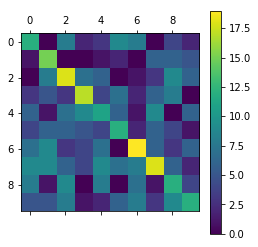

In [26]:
plt.matshow(image[0])
plt.colorbar()

In [27]:
H.shape

(1, 10, 10, 2)

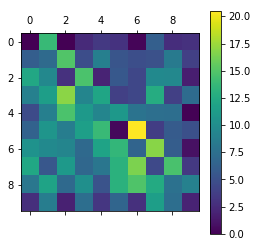

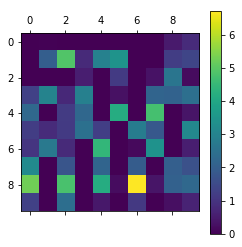

In [30]:
plt.matshow(H[0,:,:,0])
plt.colorbar()
plt.matshow(H[0,:,:,1])
plt.colorbar()

In [32]:
p1 = tf.nn.max_pool(h1,ksize=[1,2,2,1], strides=[1,2,2,1],padding='VALID')

In [38]:
p1_size = np.product([s.value for s in p1.shape[1:]])

In [36]:
np.product([1,2,3])

6

In [43]:
p1.shape[0]

Dimension(None)

In [40]:
[s.value for s in p1.shape[1:]]

[5, 5, 2]

In [45]:
p1f = tf.reshape(x,[-1,p1_size])

In [47]:
p1f.shape

TensorShape([Dimension(None), Dimension(50)])

In [48]:
P = p1.eval(feed_dict={x:image})

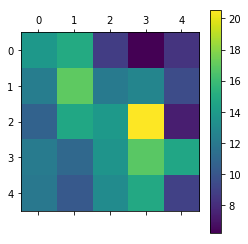

In [51]:
plt.matshow(P[0,:,:,0])
plt.colorbar()